In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
a = 4.2
b = 1.1
noise = 0.5
x = np.arange(-5.0,5.0,0.1)
y = a * x + b + np.random.normal(size=x.shape,scale=noise)

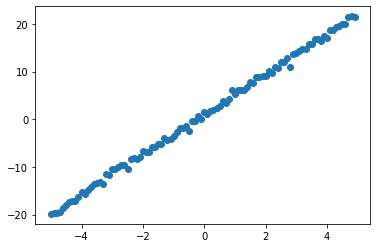

In [4]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [19]:
G = np.column_stack((x.T, np.ones(x.shape).T))

In [20]:
np.linalg.solve(G.T @ G , G.T @ y)

array([4.21258531, 1.07374325])

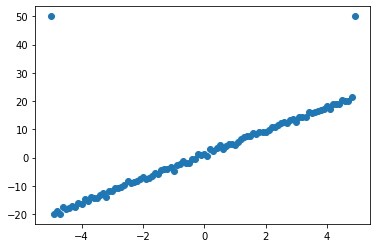

In [21]:
y[0] = 50
y[99] = 50
plt.figure()
plt.scatter(x,y)
plt.show()

In [22]:
np.linalg.solve(G.T @ G , G.T @ y)

array([3.97263659, 2.039213  ])

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y)
print(regr.coef_)
print(regr.intercept_)

[3.97263659]
2.0392129994938677


In [23]:
from sklearn import svm
s = svm.LinearSVR()
s.fit(x.reshape(-1,1),y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [24]:
print(s.coef_)
print(s.intercept_)

[4.20090914]
[1.09023876]


In [25]:
err = noise * np.ones(x.shape)
W = np.diag(1.0 / err)

In [26]:
np.linalg.solve(G.T @ W @ G , G.T @ W @ y)

array([3.97263659, 2.039213  ])

In [27]:
err[0] = 10.0
err[99] = 10.0
W = np.diag(1.0 / err)
np.linalg.solve(G.T @ W @ G , G.T @ W @ y)

array([4.20772776, 1.11821633])

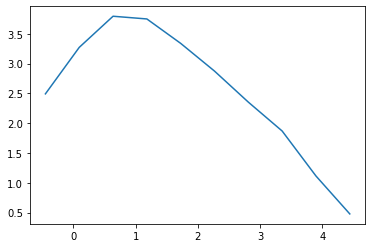

In [40]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


mag = np.genfromtxt('../Data/mag.txt',skip_header=1)
count, val = np.histogram(mag)
center = running_mean(val, 2)
logcount = np.log10(count)
plt.figure()
plt.plot(center,logcount)
plt.show()

In [39]:
regr.fit(center.reshape(-1,1),logcount)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

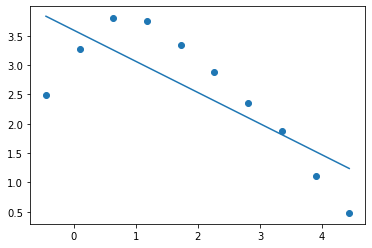

In [41]:
pred = regr.predict(center.reshape(-1,1))
plt.figure()
plt.scatter(center,logcount)
plt.plot(center,pred)
plt.show()